In [1]:
import pandas as pd
import matplotlib.pyplot as plt
ted = pd.read_csv('ted.csv')

## Using the head() function, we can have a glimpse into the data:

In [2]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Using the shape property, we can find out how many rows and columns the dataframe has:

In [3]:
ted.shape

(2550, 17)

## The dtypes property shows the data type of each column:

In [4]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

# Let's perform some analysis. First, plot the number of talks that took place each year.

## Let's change the data type of 'film_date' column to datetime:

In [7]:
ted['film_date'] = pd.to_datetime(ted['film_date'],unit='s')

## How many talks took place each year?

In [8]:
ted['film_date'].groupby(by=ted['film_date'].dt.year).count()

film_date
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: film_date, dtype: int64

## Plot the above numbers

<AxesSubplot:xlabel='film_date'>

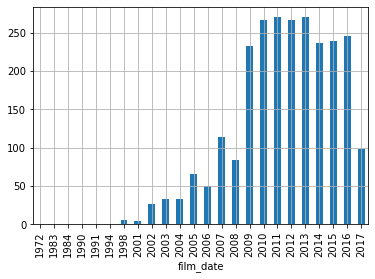

In [9]:
ted['film_date'].groupby(by=ted['film_date'].dt.year).count().plot(kind='bar',grid=True)

# How many ratings did each talk receive?

## Let's unpack the ratings. The ratings column looks like a list of dictionaries, but it actually is a string. Use the ast.literal_eval function to turn the strings into lists:

In [10]:
import ast
ted['ratings_unpacked'] = ted['ratings'].apply(ast.literal_eval)

In [11]:
ted['ratings_unpacked'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

## Next, define a function that counts the number of ratings and pass it to pandas.apply function to apply it to the whole column:

In [12]:
def count_ratings(TEDtalk):
    '''
        counts total number of ratings received by an individual TEDtalk
    '''
    count = 0
    for i in range(len(TEDtalk)):
        count += TEDtalk[i]['count']
    return count

In [13]:
ted['Number of Ratings'] = ted['ratings_unpacked'].apply(count_ratings)

## Top 10 talks by the total number of ratings:

In [27]:
ted[['description','Number of Ratings']].sort_values(by='Number of Ratings', ascending=False).head(10)

,description,Number of Ratings
0,Sir Ken Robinson makes an entertaining and pro...,93850
201,Jill Bolte Taylor got a research opportunity f...,70665
1346,"Body language affects how others see us, but i...",65968
837,Brené Brown studies human connection -- our ab...,60078
677,Simon Sinek has a simple but powerful model fo...,56779
1030,At his Stanford University commencement speech...,38158
1129,We believe we should work hard in order to be ...,32180
1163,In a culture where being social and outgoing a...,30037
176,David Gallo shows jaw-dropping footage of amaz...,30011
530,"Our lives, our cultures, are composed of many ...",29775


### Plot the top 10

In [36]:
top_ten = ted[['description','Number of Ratings']].sort_values(by='Number of Ratings', ascending=False).head(10)

<AxesSubplot:xlabel='TED Talk', ylabel='Number of ratings'>

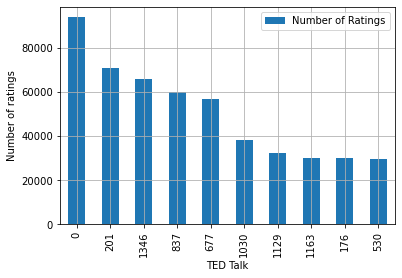

In [37]:
top_ten.plot(kind='bar',grid=True,xlabel='TED Talk',ylabel='Number of ratings')